# Uber Case Study

In [84]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [85]:
# loading libraries and reading the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme
sns.set(style="white")

In [86]:
#read data from csv
uber = pd.read_csv("Uber Request Data.csv")

### Inspecting uber dataframe

In [87]:
#read few data from uber dataframe
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [88]:
#Shape of uber dataframe
print(uber.shape)
print("*****" * 8)
#Printing details about the frames column
print(uber.info())

(6745, 6)
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None


In [89]:
#describing the uber dataframe
uber.describe(include = "all")

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 9:40,12/7/2016 21:04
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


In [90]:
#Checking for null count
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [91]:
#Inspecting null percentage
round(100*(uber.isnull().sum()/len(uber.index)),2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

### Data cleaning and formatting

Since the Driver id and Drop timestamp has a large percentage of null values and these columns are not needed for further analysis, hence dropping them

In [92]:
#Dropping unneccessary columns with null values as well
uber = uber.drop(['Driver id','Drop timestamp'], axis = 1)

From the above inspection it is evident that the Request timestamp is not in datetime format

In [93]:
#Coverting Request timestamp in proper format
# the dayfirst = True parses dates with the day as the first parameter in date
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], dayfirst= True)

In [94]:
#Checking the dataset
uber.head(10)

,Request id,Pickup point,Status,Request timestamp
0,619,Airport,Trip Completed,2016-07-11 11:51:00
1,867,Airport,Trip Completed,2016-07-11 17:57:00
2,1807,City,Trip Completed,2016-07-12 09:17:00
3,2532,Airport,Trip Completed,2016-07-12 21:08:00
4,3112,City,Trip Completed,2016-07-13 08:33:16
5,3879,Airport,Trip Completed,2016-07-13 21:57:28
6,4270,Airport,Trip Completed,2016-07-14 06:15:32
7,5510,Airport,Trip Completed,2016-07-15 05:11:52
8,6248,City,Trip Completed,2016-07-15 17:57:27
9,267,City,Trip Completed,2016-07-11 06:46:00


In [95]:
#Checking if the format has been corrected or not
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 4 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 210.9+ KB


In [96]:
#Describe the dataset
uber.describe(include = "all")

,Request id,Pickup point,Status,Request timestamp
count,6745.000000,6745,6745,6745
unique,NaN,2,3,5618
top,NaN,City,Trip Completed,2016-07-11 17:57:00
freq,NaN,3507,2831,6
first,NaN,NaN,NaN,2016-07-11 00:00:00
last,NaN,NaN,NaN,2016-07-15 23:59:58
mean,3384.644922,NaN,NaN,NaN
std,1955.099667,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,NaN,NaN


In [97]:
#Checking for null values
uber.isnull().sum()

Request id           0
Pickup point         0
Status               0
Request timestamp    0
dtype: int64

In [98]:
#Checking the null percentage and shape
print(uber.shape)
print(len(uber.index))
round(100*(uber.isnull().sum()/len(uber.index)),2)

(6745, 4)
6745


Request id           0.0
Pickup point         0.0
Status               0.0
Request timestamp    0.0
dtype: float64

In [99]:
#Checking for the unique values in Status
uber['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [100]:
#Checking for unique values for year and month
print(uber['Request timestamp'].dt.year.unique())
print(uber['Request timestamp'].dt.month.unique())

[2016]
[7]


Since the year and month have only sigle values, hence not segregating them.

In [101]:
#Since the analysis is dependent on the hour of the day, So just separating the hour
uber['hour'] = uber['Request timestamp'].dt.hour

In [102]:
#Creating new bins diving the hours of a day into different timeslot such as early morning, morning etc
buckets = [0,4,8,12,16,20,24]
labels = ['late night', 'early morning', 'morning', 'afternoon', 'evening', 'night']
uber['time slot'] = pd.cut(uber['hour'], bins=buckets, labels=labels, include_lowest=True, right=False)
uber.head(10)

,Request id,Pickup point,Status,Request timestamp,hour,time slot
0,619,Airport,Trip Completed,2016-07-11 11:51:00,11,morning
1,867,Airport,Trip Completed,2016-07-11 17:57:00,17,evening
2,1807,City,Trip Completed,2016-07-12 09:17:00,9,morning
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,21,night
4,3112,City,Trip Completed,2016-07-13 08:33:16,8,morning
5,3879,Airport,Trip Completed,2016-07-13 21:57:28,21,night
6,4270,Airport,Trip Completed,2016-07-14 06:15:32,6,early morning
7,5510,Airport,Trip Completed,2016-07-15 05:11:52,5,early morning
8,6248,City,Trip Completed,2016-07-15 17:57:27,17,evening
9,267,City,Trip Completed,2016-07-11 06:46:00,6,early morning


The slots are divided by creating a bin of 4 hours and the different labels are early morning, morning, afternoon, evening, night and late night

In [103]:
#Checking for the unique values in dataframe
print(uber['hour'].unique())

#Checking for the number of unique values in dataframe
print(uber['hour'].nunique())

[11 17  9 21  8  6  5 12  4 14 22 10 18 15  2 13 16 19  7 20  0  3 23  1]
24


In [104]:
round(100*(uber.isnull().sum()/len(uber.index)),2)

Request id           0.0
Pickup point         0.0
Status               0.0
Request timestamp    0.0
hour                 0.0
time slot            0.0
dtype: float64

In [105]:
#Checking the dataset again
uber.head(10)

,Request id,Pickup point,Status,Request timestamp,hour,time slot
0,619,Airport,Trip Completed,2016-07-11 11:51:00,11,morning
1,867,Airport,Trip Completed,2016-07-11 17:57:00,17,evening
2,1807,City,Trip Completed,2016-07-12 09:17:00,9,morning
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,21,night
4,3112,City,Trip Completed,2016-07-13 08:33:16,8,morning
5,3879,Airport,Trip Completed,2016-07-13 21:57:28,21,night
6,4270,Airport,Trip Completed,2016-07-14 06:15:32,6,early morning
7,5510,Airport,Trip Completed,2016-07-15 05:11:52,5,early morning
8,6248,City,Trip Completed,2016-07-15 17:57:27,17,evening
9,267,City,Trip Completed,2016-07-11 06:46:00,6,early morning


## Visually identifying the most pressing problems for Uber:

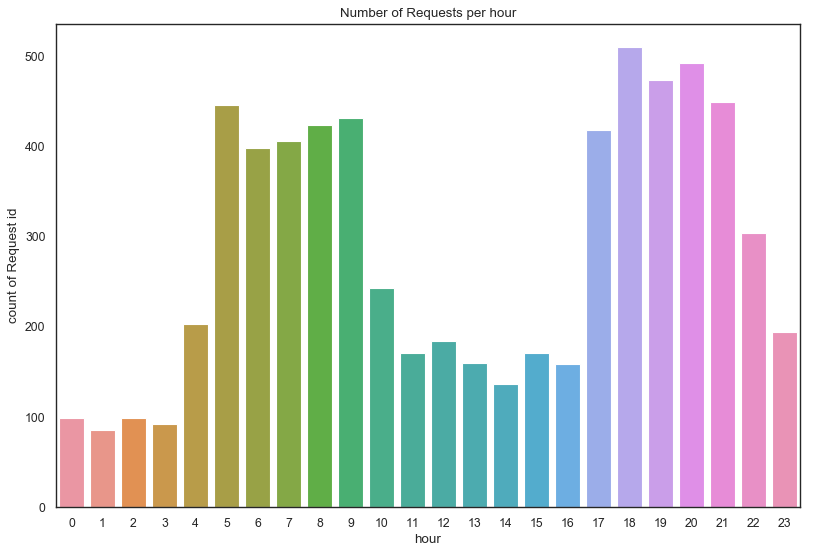

In [106]:
#Plotting number of requests per hour
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='hour', y='Request id', data=uber, estimator=len)
plt.title("Number of Requests per hour")
plt.ylabel("count of Request id")
plt.show()

From the plot it is clear that the houre between 5-10 am and 17-22 pm has the highest number of requests

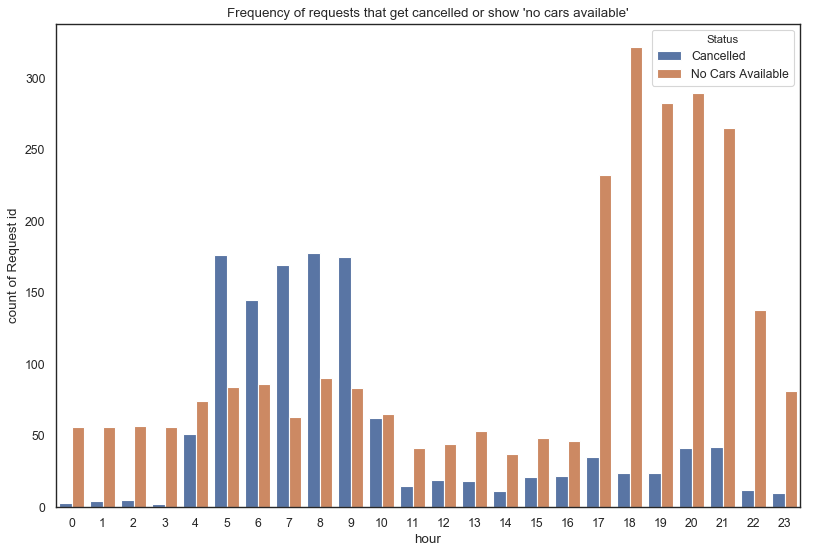

In [107]:
#Plot of the frequency of requests that get cancelled or show 'no cars available'
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')


sns.barplot(x='hour', y='Request id', hue='Status', data=uber[uber.Status != 'Trip Completed'], estimator=len)
plt.ylabel("count of Request id")
plt.title("Frequency of requests that get cancelled or show 'no cars available'")
plt.show()

The maximum number of requests made between 5-10 am are cancelled and the maximum number of requests made between 17-22 pm shows no cars avaialble

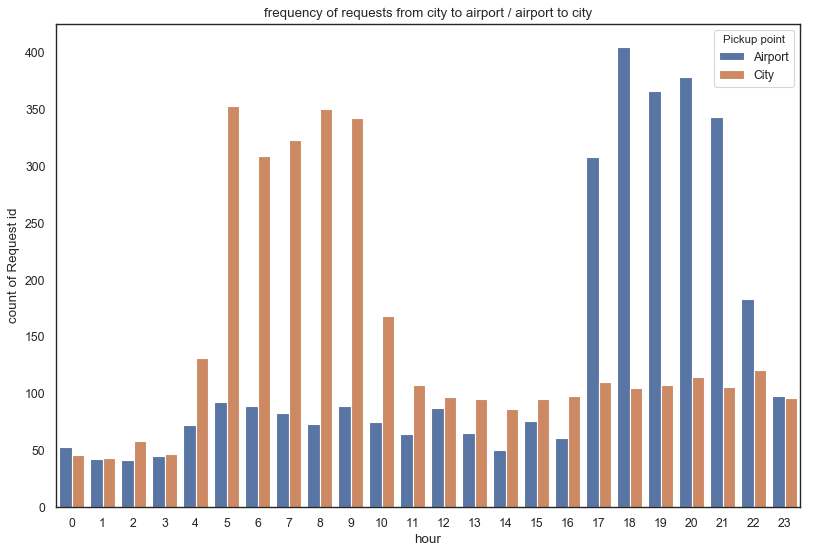

In [108]:
#Plot of the frequency of requests from city to airport / airport to city 
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')


sns.barplot(x='hour', y='Request id', hue='Pickup point', data=uber, estimator=len)
plt.ylabel('count of Request id')
plt.title("frequency of requests from city to airport / airport to city")
plt.show()

The highest number request between 5-10 am are from city to airport and the highest number requests made between 17-22 pm are from airport to city

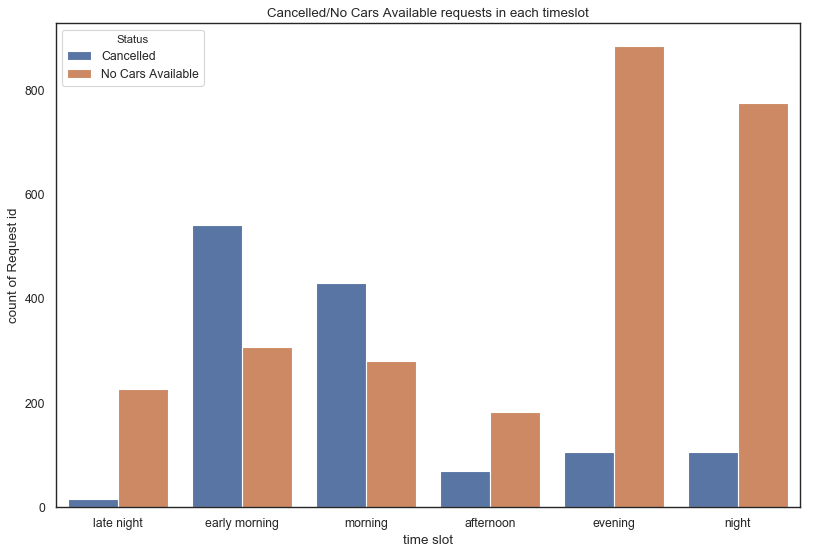

In [109]:
#Plot of the frequency of requests Cancelled or Requests for which no cars were available in each timeslot
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='time slot', y='Request id', hue='Status', data=uber[uber.Status != 'Trip Completed'], estimator=len)
plt.ylabel("count of Request id")
plt.title("Cancelled/No Cars Available requests in each timeslot")
plt.show()

Most of the requests in the early morning and morning slots are getting cancelled and most of the requests in the evening and night slots are showing no cars available

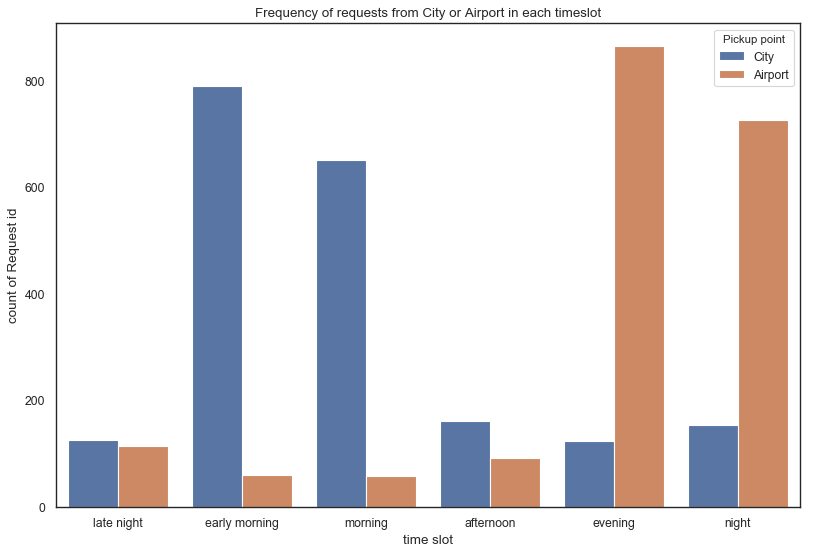

In [110]:
#Plot of the frequency of requests from City or Airport in each timeslot
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='time slot', y='Request id', hue='Pickup point', data=uber[uber.Status != 'Trip Completed'], estimator=len)
plt.ylabel('count of Request id')
plt.title("Frequency of requests from City or Airport in each timeslot")
plt.show()

Most of the requests from city are getting cancelled in the early morning and morning slot and most of the request from airport are showing no cars available in evening and night slots

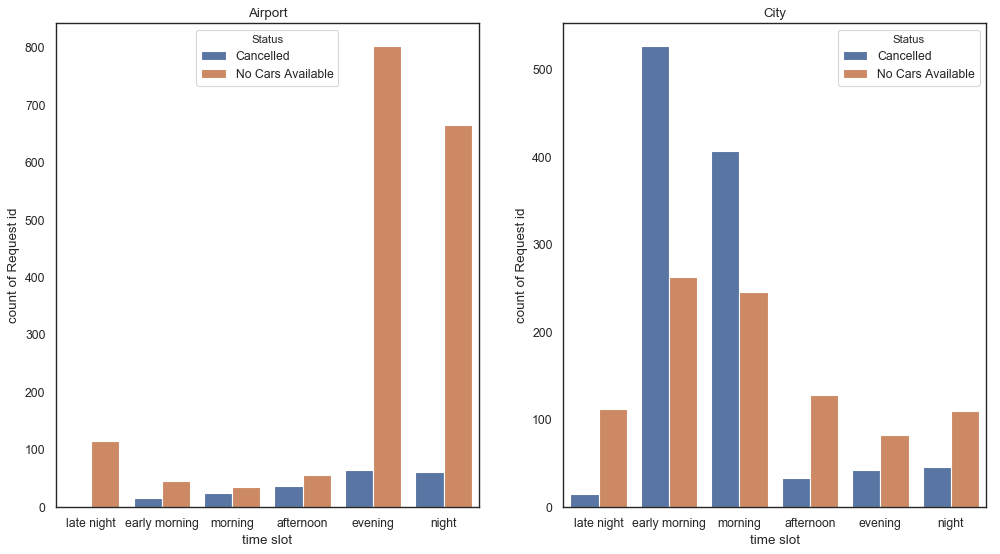

In [111]:
#Plots of the frequency of requests Cancelled or Requests for which no cars were available in each timeslot for both Airport and City
plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
plt.subplot(1,2,1)
sns.barplot(x='time slot', y='Request id', hue='Status', data=uber[(uber['Pickup point'] == 'Airport') & (uber['Status'] != 'Trip Completed')], estimator=len)
plt.ylabel('count of Request id')
plt.title('Airport')


plt.subplot(1,2,2)
sns.barplot(x='time slot', y='Request id', hue='Status', data=uber[(uber['Pickup point'] == 'City')  & (uber['Status'] != 'Trip Completed')], estimator=len)
plt.ylabel('count of Request id')
plt.title('City')
plt.show()

From the plots above, it can be concluded that: <br>
- `A very high number of requests made from City for Airport are getting cancelled in the early morning and morning timeslots` and <br>
- `A very high number of requests made from Airport for City are showing no cars available in the evening and night timeslots` <br>
**And this is the most pressing problems for Uber as it can significantly affect the revenue of Uber.**

##  Gap between supply and demand 

Considering Demand to be total number of requests made
`Demand = Trip Completed + Cancelled + No cars available`
and Supply to be actually the trips which got completed
`Supply = Trip Completed`

In [112]:
#Creating Demand, Supply and Gap Columns by grouping frequency of requests on the basis of timeslots
ds = pd.DataFrame(uber.groupby(by='time slot', as_index=False)['Request id'].count())
ds.columns.values[1] = 'Demand'
supply =uber[uber.Status == 'Trip Completed'].groupby(by='time slot', as_index=False)['Request id'].count()
supply.columns.values[1] = 'Supply'
ds['Supply'] = supply['Supply']
ds['Gap'] = ds['Demand']- ds['Supply']
ds

,time slot,Demand,Supply,Gap
0,late night,375,136,239
1,early morning,1452,604,848
2,morning,1268,559,709
3,afternoon,651,400,251
4,evening,1560,572,988
5,night,1439,560,879


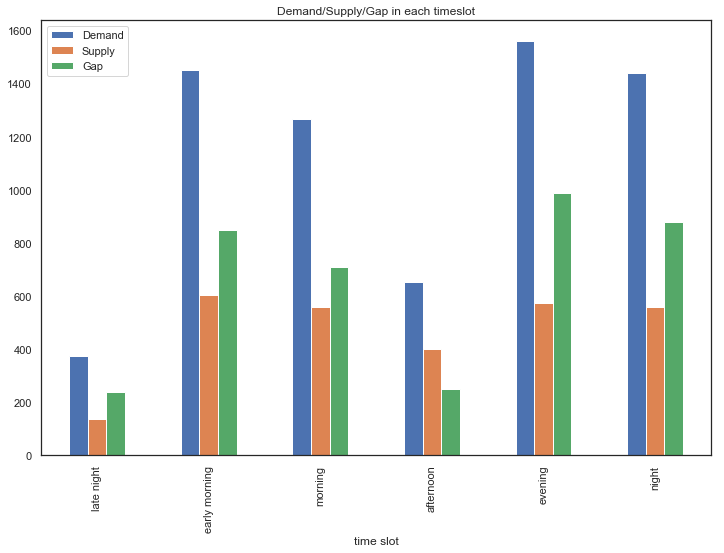

In [113]:
#Plot showing the total demand, supply and the gap between demand and supply in each timeslot
ds.plot(x='time slot', y = ['Demand', 'Supply', 'Gap'], kind='bar', figsize=(12,8), title ="Demand/Supply/Gap in each timeslot")

**From the plot above it is visible that highest gap exist in early morning, morning, evening and night timeslots.**

In [114]:
#Creating Demand, Supply and Gap Columns by grouping frequency of requests on the basis of timeslots
#for requests made from airport
airport = uber[uber['Pickup point'] == 'Airport']
dsa = pd.DataFrame(airport.groupby(by='time slot', as_index=False)['Request id'].count())
dsa.columns.values[1] = 'Demand'
supply =airport[airport.Status == 'Trip Completed'].groupby(by='time slot', as_index=False)['Request id'].count()
supply.columns.values[1] = 'Supply'
dsa['Supply'] = supply['Supply']
dsa['Gap'] = dsa['Demand']- dsa['Supply']
dsa

,time slot,Demand,Supply,Gap
0,late night,181,67,114
1,early morning,336,277,59
2,morning,301,243,58
3,afternoon,278,187,91
4,evening,1140,276,864
5,night,1002,277,725


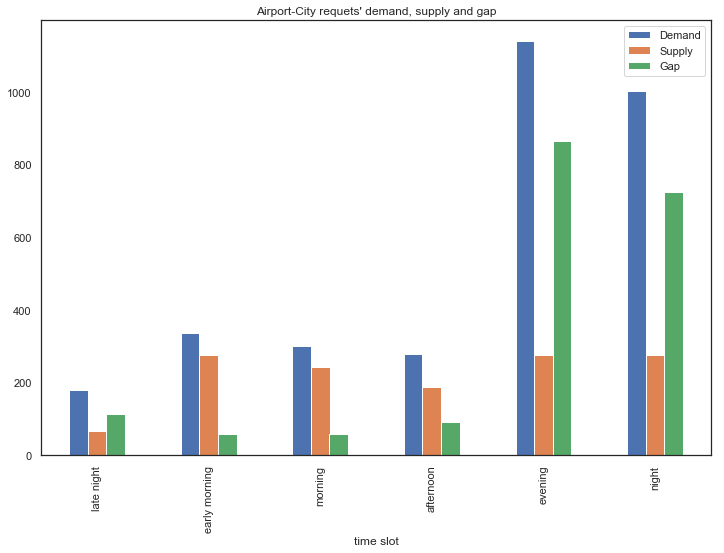

In [115]:
#Plot showing the total demand, supply and the gap between demand and supply in each timeslot for request made from Airport
dsa.plot(x='time slot', y = ['Demand', 'Supply', 'Gap'], kind='bar', figsize=(12,8), title = "Airport-City requets' demand, supply and gap")

**For the slots evening and night the highest gap exists for the requests type airport-city**

In [116]:
#Creating Demand, Supply and Gap Columns by grouping frequency of requests on the basis of timeslots
#for requests made from city
city = uber[uber['Pickup point'] == 'City']
dsc = pd.DataFrame(city.groupby(by='time slot', as_index=False)['Request id'].count())
dsc.columns.values[1] = 'Demand'
supply =city[city.Status == 'Trip Completed'].groupby(by='time slot', as_index=False)['Request id'].count()
supply.columns.values[1] = 'Supply'
dsc['Supply'] = supply['Supply']
dsc['Gap'] = dsc['Demand']- dsc['Supply']
dsc

,time slot,Demand,Supply,Gap
0,late night,194,69,125
1,early morning,1116,327,789
2,morning,967,316,651
3,afternoon,373,213,160
4,evening,420,296,124
5,night,437,283,154


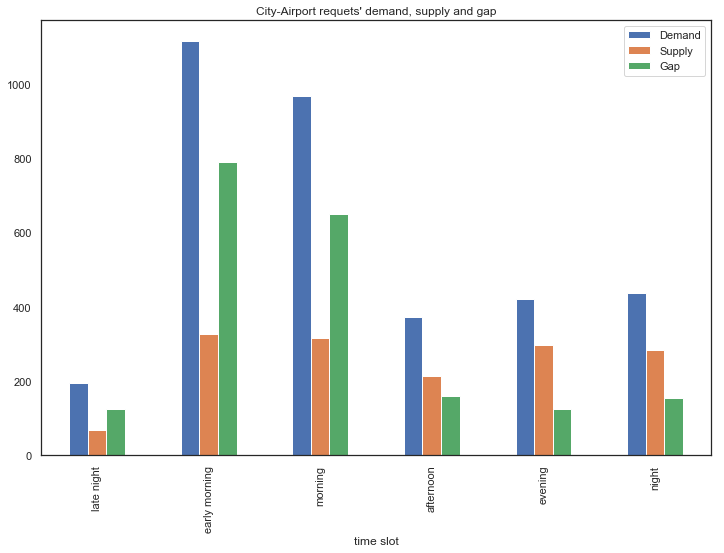

In [117]:
#Plot showing the total demand, supply and the gap between demand and supply in each timeslot for request made from City
dsc.plot(x='time slot', y = ['Demand', 'Supply', 'Gap'], kind='bar', figsize=(12,8), title = "City-Airport requets' demand, supply and gap")

**For the slots early morning and morning the highest gap exists for the request type city-airport.**